<a href="https://colab.research.google.com/github/GauriRB/ML_Lab/blob/main/simplelinearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#STEP-1: Import Libraries
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
#STEP-2: Autheticate E-Mail ID
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#STEP-3: Get File from Drive using file-ID

downloaded = drive.CreateFile({'id':'1e10Ynfgrc35FtMl2V5qpzTGyuWF4KQsZ'}) # replace the id with id of file you want to access
downloaded.GetContentFile('hw.csv')


SLR on hw.csv

In [ ]:
#STEP-4: Read file as panda dataframe
import pandas as pd
xyz = pd.read_csv('hw.csv')
print(xyz.head(5))

   height  weight
0     151      63
1     174      81
2     138      56
3     186      91
4     128      47


   height  weight
0     151      63
1     174      81
2     138      56
3     186      91
4     128      47
5     136      57
6     179      76
7     163      72
8     152      62
9     131      48
[[151]
 [174]
 [138]
 [186]
 [128]
 [136]
 [179]
 [163]
 [152]
 [131]]
[63 81 56 91 47 57 76 72 62 48]
y= [0.67461045]X + -38.45508707607701
Accuracy: 95.47822477500306


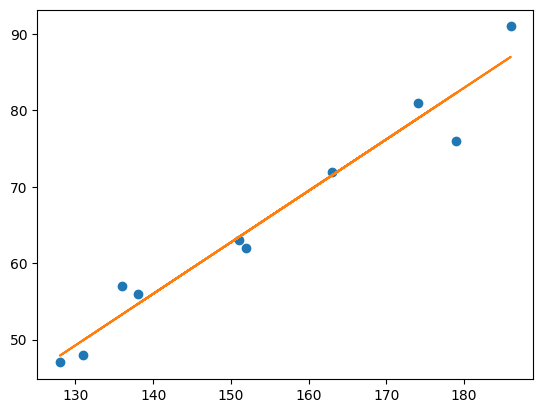

Enter Height:130


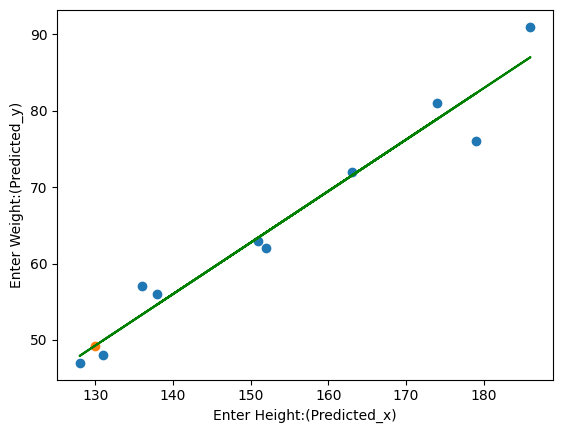

In [ ]:
#step-5 :Running Actual Program(SLR)
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Load dataset
dataset=pd.read_csv("hw.csv")
# To display dataset
print(dataset)
x=dataset.iloc[:,:-1].values
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,1].values
print(X)
print(y)
#from sklearn subpackage import linear regression model
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X,y)
#To get the slop
regressor.coef_
#To get the y intercept
regressor.intercept_
#To print the equation of line
print("y= "+ str(regressor.coef_) + "X + " + str(regressor.intercept_))

#To get the slop
print("Accuracy:",regressor.score(X,y)*100)
#To plot graph
plt.plot(X,y,'o')
plt.plot(X,regressor.predict(X));
plt.show()
predict_x=int(input('Enter Height:'))
predict_y=(0.67461045*predict_x)-38.45508707607698
plt.scatter(X,y)
plt.scatter(predict_x,predict_y)
plt.xlabel('Enter Height:(Predicted_x)')
plt.ylabel('Enter Weight:(Predicted_y)')
#plotting the Predicted regression line
plt.plot(X,regressor.predict(X),color='green');
plt.show()



SLR on SLR-Data.csv


In [ ]:
downloaded = drive.CreateFile({'id':'1ORTNkZgo6uc5VSYopHxl787fPdrs7-LT'}) # replace the id with id of file you want to access
downloaded.GetContentFile('SLR-Data.csv')
#https://drive.google.com/file/d/1ORTNkZgo6uc5VSYopHxl787fPdrs7-LT/view?usp=sharing

(8, 2)
   No of Hours Spent During(X)  Risk Score on a scale of 0-100(Y)
0                           10                                 95
1                            9                                 80
2                            2                                 10
3                           15                                 50
4                           10                                 45
Slope,Intercept: 4.58789860997547 12.584627964022893


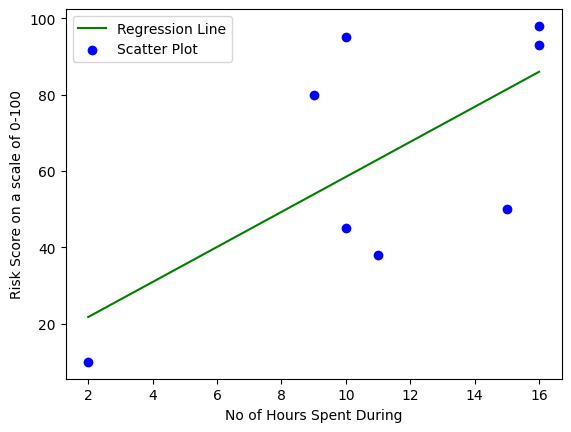

Root Mean Squares Error: 22.759716640449565
Accuracy: 43.709481451010035
Enter No Hours Spent in Driving:5


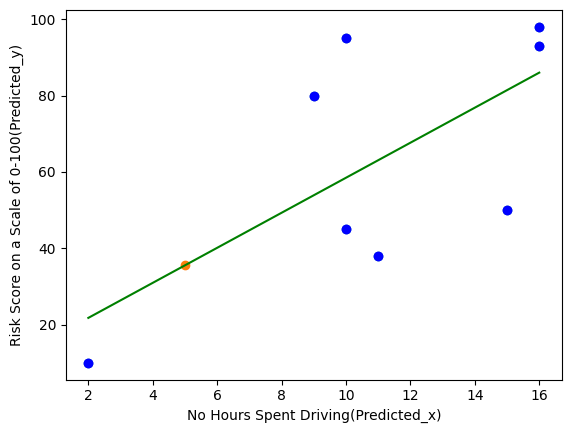

In [ ]:
#installation of python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
data = pd.read_csv('SLR-Data.csv')
print(data.shape)
print(data.head())
#print(data.describe())

# Collecting X and Y
X = data['No of Hours Spent During(X)'].values
Y = data['Risk Score on a scale of 0-100(Y)'].values

# Calculate Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)
#print(mean_x)
#print(mean_y)
# Total number of values
m = len(X)
# Using the formula to calculate b1(slope) and b0(intercept)
numer = 0
denom = 0
for i in range(m):
    numer += (X[i] - mean_x) * (Y[i] - mean_y)
    denom += (X[i] - mean_x) ** 2
b1 = numer / denom
b0 = mean_y - (b1 * mean_x)

# Print coefficients:b1,b0
print("Slope,Intercept:",b1,b0)

# Plotting Values and Regression Line
max_x = np.max(X)
min_x = np.min(X)

# Calculating line values x and y
x = np.linspace(min_x, max_x)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='green', label='Regression Line')
# Ploting Scatter Points
plt.scatter(X, Y, c='blue', label='Scatter Plot')
plt.xlabel('No of Hours Spent During')
plt.ylabel('Risk Score on a scale of 0-100')
plt.legend()
plt.show()

#For  Calculating Root Mean Squares Error
rmse = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/m)
print("Root Mean Squares Error:",rmse)
# Calculating Accuracy Score
ss_t = 0
ss_r = 0
for i in range(m):
    y_pred = b0 + b1 * X[i]
    ss_t += (Y[i] - mean_y) ** 2
    ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print("Accuracy:",r2*100)
#predicting a o/p (y) for new value of x
predict_x=int(input('Enter No Hours Spent in Driving:'))
predict_y=(4.58789861*predict_x)+12.584627964022907
plt.scatter(X,Y)
plt.scatter(predict_x,predict_y)
plt.xlabel('No Hours Spent Driving(Predicted_x)')
plt.ylabel('Risk Score on a Scale of 0-100(Predicted_y)')
 #plotting the regression line
plt.scatter(X, Y, c='blue')
plt.plot(x, y, color='green')
# function to show plot
plt.show()